<a href="https://colab.research.google.com/github/Xyniath/Dog-Breed-Identification/blob/main/Dog_Breed_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog Breed Identification
### <span style="color:red">USE PYTHON 3.7</span>
Jupyter notebook to document and display outputs for live code.
*Currently using test code from tensorflow's image classification* found:
[here](https://www.tensorflow.org/tutorials/images/classification)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Code written here imports required libraries for function

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
tf.__version__

'2.4.1'

placeholder

In [18]:
import pathlib
!unzip "/content/drive/MyDrive/data.zip" -d "/opt/dog_photos"
data_dir = "/opt/dog_photos/dog_photos"
data_dir = pathlib.Path(data_dir)
print(data_dir)


Streaming output truncated to the last 5000 lines.
  inflating: /opt/dog_photos/train/japanese_spaniel/dc07c140b26ba8f2c75770f00229270b.jpg  
  inflating: /opt/dog_photos/train/japanese_spaniel/e5679014512835a825578b7b15676df2.jpg  
  inflating: /opt/dog_photos/train/japanese_spaniel/e7f2f67cb616281a89fc77a6bdea6eb0.jpg  
  inflating: /opt/dog_photos/train/japanese_spaniel/ea1c23bc0a6d8c057a12d2a68b44c7c2.jpg  
  inflating: /opt/dog_photos/train/japanese_spaniel/ea5be84db93c42752547df879813ce47.jpg  
  inflating: /opt/dog_photos/train/japanese_spaniel/eb40629be9b4a1676e2277d19c43e4b0.jpg  
  inflating: /opt/dog_photos/train/japanese_spaniel/ed38d69eab73e9a66526ee16231f687a.jpg  
  inflating: /opt/dog_photos/train/japanese_spaniel/f827aadcd7537def18615dc19f650456.jpg  
  inflating: /opt/dog_photos/train/japanese_spaniel/f84bcbdda7152edced4b693e1ccaa888.jpg  
  inflating: /opt/dog_photos/train/japanese_spaniel/f97da1d8c57873986183092ec4d5fc13.jpg  
  inflating: /opt/dog_photos/train/japa

In [20]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

10222


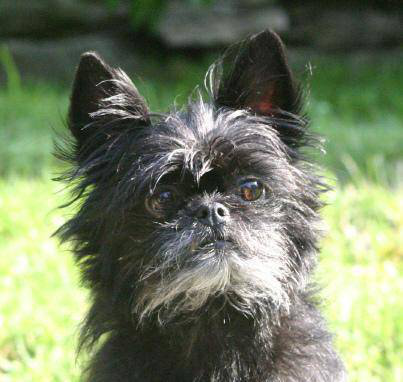

In [21]:
affenpinscher = list(data_dir.glob('affenpinscher/*'))
PIL.Image.open(str(affenpinscher[0]))

In [22]:
batch_size = 32
image_height = 180
image_width = 180

In [23]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
    validation_split=0.2,
    subset = "training",
    seed = 123,
    image_size = (image_height, image_width),
    batch_size = batch_size)

Found 10222 files belonging to 120 classes.
Using 8178 files for training.


In [24]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "validation",
  seed = 123,
  image_size = (image_height, image_width),
  batch_size = batch_size)

Found 10222 files belonging to 120 classes.
Using 2044 files for validation.


In [25]:
class_names = train_ds.class_names
print(class_names)

['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale', 'american_staffordshire_terrier', 'appenzeller', 'australian_terrier', 'basenji', 'basset', 'beagle', 'bedlington_terrier', 'bernese_mountain_dog', 'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound', 'bluetick', 'border_collie', 'border_terrier', 'borzoi', 'boston_bull', 'bouvier_des_flandres', 'boxer', 'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff', 'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua', 'chow', 'clumber', 'cocker_spaniel', 'collie', 'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo', 'doberman', 'english_foxhound', 'english_setter', 'english_springer', 'entlebucher', 'eskimo_dog', 'flat-coated_retriever', 'french_bulldog', 'german_shepherd', 'german_short-haired_pointer', 'giant_schnauzer', 'golden_retriever', 'gordon_setter', 'great_dane', 'great_pyrenees', 'greater_swiss_mountain_dog', 'groenendael', 'ibizan_hound', 'irish_setter', 'irish_terrier', 'iris

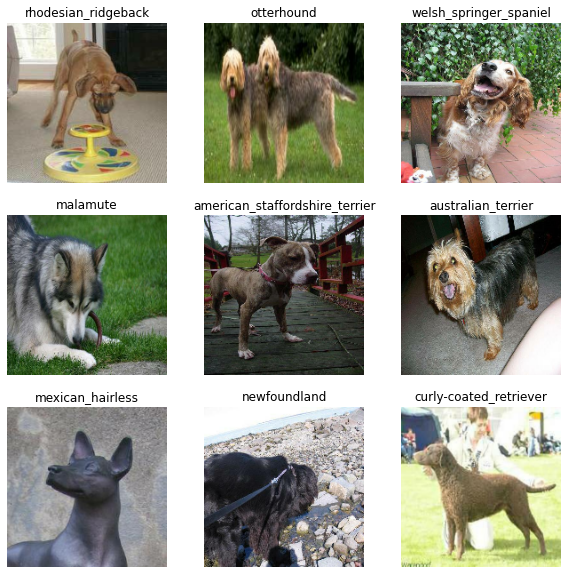

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [27]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [28]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [29]:
normalisation_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [30]:
normalised_ds = train_ds.map(lambda x, y: (normalisation_layer(x), y))
image_batch, labels_batch = next(iter(normalised_ds))
first_image = image_batch[0]
#Notice the pixels values are now in `[0,1,]`.
print(np.min(first_image), np.max(first_image))

0.0066570346 1.0


In [37]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(image_height, 
                                                              image_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

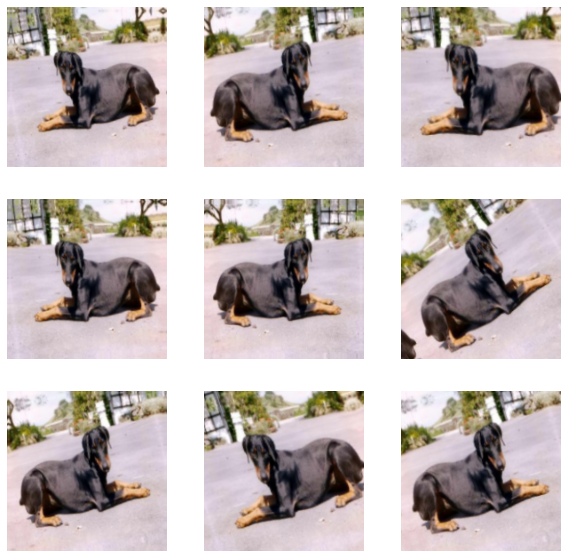

In [38]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [48]:
num_classes = 120

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [49]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)       

In [51]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
256/256 [==============================] - 6s 22ms/step - loss: 4.8040 - accuracy: 0.0092 - val_loss: 4.7835 - val_accuracy: 0.0142
Epoch 2/15
256/256 [==============================] - 6s 22ms/step - loss: 4.6553 - accuracy: 0.0245 - val_loss: 4.4831 - val_accuracy: 0.0357
Epoch 3/15
256/256 [==============================] - 6s 22ms/step - loss: 4.4218 - accuracy: 0.0378 - val_loss: 4.3653 - val_accuracy: 0.0504
Epoch 4/15
256/256 [==============================] - 6s 22ms/step - loss: 4.2700 - accuracy: 0.0568 - val_loss: 4.2836 - val_accuracy: 0.0528
Epoch 5/15
256/256 [==============================] - 6s 22ms/step - loss: 4.1689 - accuracy: 0.0695 - val_loss: 4.2178 - val_accuracy: 0.0621
Epoch 6/15
256/256 [==============================] - 6s 22ms/step - loss: 4.0779 - accuracy: 0.0822 - val_loss: 4.1929 - val_accuracy: 0.0602
Epoch 7/15
256/256 [==============================] - 6s 22ms/step - loss: 4.0402 - accuracy: 0.0888 - val_loss: 4.1526 - val_accuracy: 0.0768

**TRAINING RESULTS**

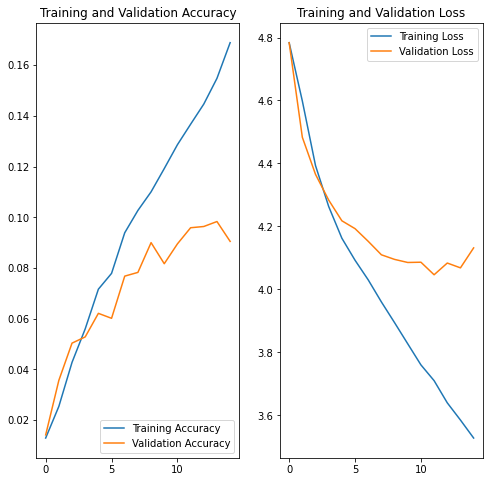

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**PREDICTING DATA**